In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [49]:
dataset=pd.read_csv("ATOC Historical Data.csv",index_col='Date',parse_dates=True)

In [50]:
dataset

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-11-10,131.99,132.00,134.00,131.40,14.60K,0.56%
2021-11-09,131.25,137.11,137.11,131.25,65.40K,-6.08%
2021-11-08,139.75,138.17,142.00,138.00,30.20K,-0.04%
2021-11-05,139.80,141.50,144.00,138.10,47.60K,0.47%
2021-11-04,139.15,140.00,141.98,139.05,17.60K,-1.32%
...,...,...,...,...,...,...
2017-10-17,150.42,149.98,152.50,149.98,16.80K,1.11%
2017-10-16,148.77,144.58,150.37,142.08,43.20K,3.88%
2017-10-13,143.22,148.33,148.33,141.56,34.92K,-10.63%


In [51]:
dataset.rename({'Price':'Close'},axis=1,inplace=True)

In [52]:
dataset.isna()

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-11-10,False,False,False,False,False,False
2021-11-09,False,False,False,False,False,False
2021-11-08,False,False,False,False,False,False
2021-11-05,False,False,False,False,False,False
2021-11-04,False,False,False,False,False,False
...,...,...,...,...,...,...
2017-10-17,False,False,False,False,False,False
2017-10-16,False,False,False,False,False,False
2017-10-13,False,False,False,False,False,False


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2021-11-10 to 2017-10-11
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1005 non-null   float64
 1   Open      1005 non-null   float64
 2   High      1005 non-null   float64
 3   Low       1005 non-null   float64
 4   Vol.      1005 non-null   object 
 5   Change %  1005 non-null   object 
dtypes: float64(4), object(2)
memory usage: 55.0+ KB


<AxesSubplot:xlabel='Date'>

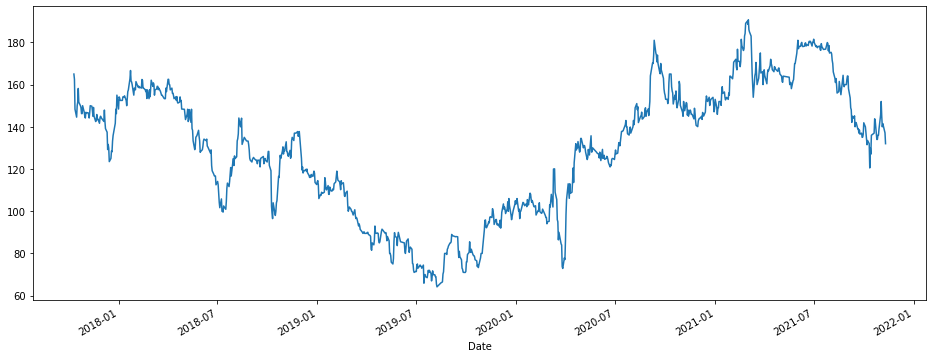

In [54]:
dataset['Open'].plot(figsize=(16,6))

In [55]:
dataset['Vol.']=dataset['Vol.'].str.replace('K','')
dataset['Vol.']=dataset['Vol.'].str.replace('M','')
dataset['Vol.']=dataset['Vol.'].astype(float)

In [56]:
dataset['Change %']=dataset['Change %'].str.replace('%','')
dataset['Change %']=dataset['Change %'].astype(float)

# Rolling Mean

In [57]:
rolling_mean=dataset.rolling(7).mean().head(20)
rolling_mean

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-11-10,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-09,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-05,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-03,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-02,138.302857,140.840000,142.457143,137.567143,35.814286,-1.598571
2021-11-01,140.590000,142.802857,144.742857,139.102857,42.042857,-1.127143
2021-10-29,142.197143,143.072857,145.512857,140.140000,45.185714,0.007143


<AxesSubplot:xlabel='Date'>

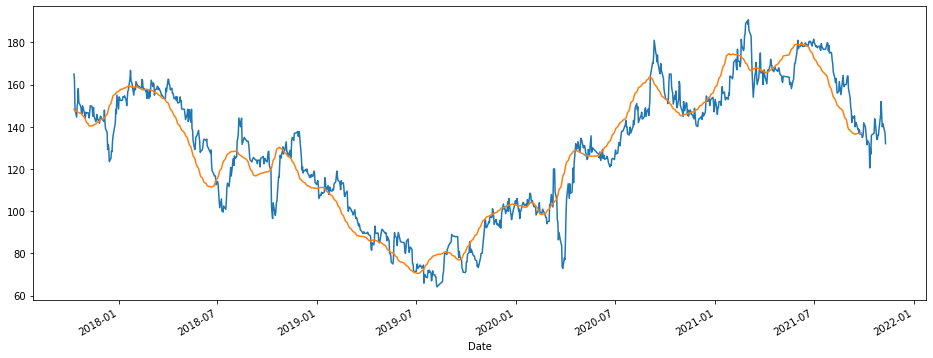

In [58]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

In [61]:
dataset['Cose 30 days mean']=dataset['Close'].rolling(window=30).mean()

In [63]:
dataset.rename({'Cose 30 days mean':'Close 30 days mean'},axis=1,inplace=True)

<AxesSubplot:xlabel='Date'>

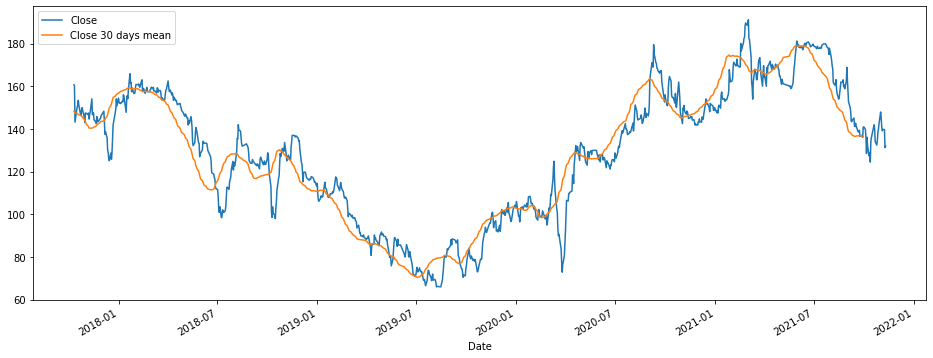

In [67]:
dataset[['Close','Close 30 days mean']].plot(figsize=(16,6))

In [72]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)
training_set.head()

,Open
Date,
2021-11-10,132.00
2021-11-09,137.11
2021-11-08,138.17
2021-11-05,141.50
2021-11-04,140.00


### Feature Scaling

In [74]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.5360784 ],
       [0.57646408],
       [0.58484154],
       ...,
       [0.6651387 ],
       [0.77712795],
       [0.79680708]])

In [85]:
# 60 days for 1 output i.e output on every 60th day
x_train=[]
y_train=[]
for i in range(60,len(training_set)):
    x_train.append(training_set_scaled[i-60:60,0])
    y_train.append(training_set_scaled[i,0])


In [86]:
# reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

AttributeError: 'list' object has no attribute 'shape'

In [88]:
!pip install keras

     |████████████████████████████████| 1.3 MB 52 kB/s eta 0:00:013


In [89]:
# Building the RNN Model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

ModuleNotFoundError: No module named 'tensorflow'